In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as ss

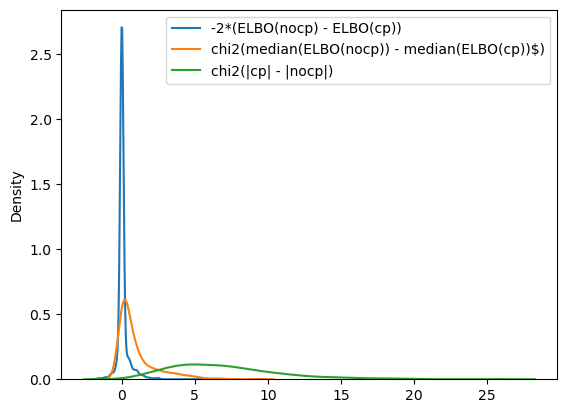

((array([3.47664821e-25, 4.18908378e-22, 1.74902617e-20, 2.20607619e-19,
         1.50765076e-18, 7.09241301e-18, 2.59412084e-17, 7.91587658e-17,
         2.10686544e-16, 5.03939625e-16, 1.10627137e-15, 2.26341808e-15,
         4.36633880e-15, 8.01312869e-15, 1.40889471e-14, 2.38671648e-14,
         3.91351976e-14, 6.23487566e-14, 9.68185090e-14, 1.46933405e-13,
         2.18425192e-13, 3.18678896e-13, 4.57094314e-13, 6.45503841e-13,
         8.98652172e-13, 1.23474375e-12, 1.67606404e-12, 2.24968095e-12,
         2.98823316e-12, 3.93081201e-12, 5.12394437e-12, 6.62268366e-12,
         8.49181690e-12, 1.08071956e-11, 1.36571985e-11, 1.71443356e-11,
         2.13870002e-11, 2.65213804e-11, 3.27035378e-11, 4.01116625e-11,
         4.89485158e-11, 5.94440695e-11, 7.18583523e-11, 8.64845136e-11,
         1.03652117e-10, 1.23730670e-10, 1.47133413e-10, 1.74321359e-10,
         2.05807616e-10, 2.42161999e-10, 2.84015927e-10, 3.32067650e-10,
         3.87087787e-10, 4.49925207e-10, 5.21513261

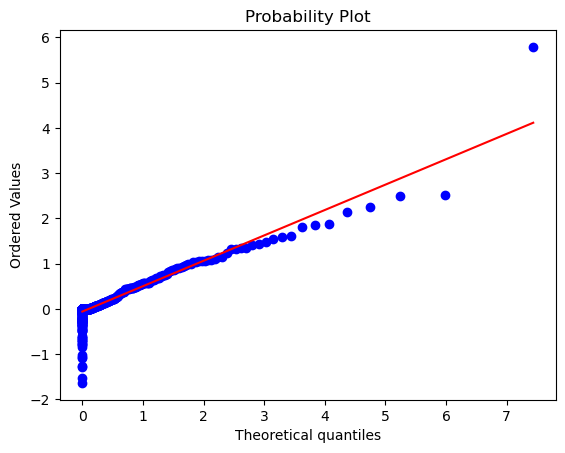

In [23]:
arr2 = np.loadtxt("elbo-vgp-constant.txt")
arr2
sns.kdeplot(-2*(arr2[:,0] - arr2[:,1]), label="-2*(ELBO(nocp) - ELBO(cp))")
sns.kdeplot(ss.chi2(1).rvs(len(arr2)), label="chi2(median(ELBO(nocp)) - median(ELBO(cp))$)")
sns.kdeplot(ss.chi2(7).rvs(len(arr2)), label="chi2(|cp| - |nocp|)")
plt.legend()
plt.show()
ss.probplot(np.sort(-2*arr2[:,-1]), dist=ss.chi2(0.25), plot=plt)

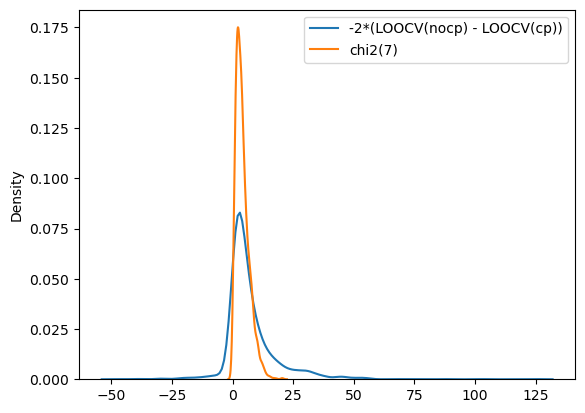

((array([ 0.42090123,  0.55002801,  0.63428129, ..., 23.85395458,
         25.00226274, 27.15664663]),
  array([-47.10905065, -40.58560614, -38.1240678 , ...,  87.19244654,
         102.96537985, 125.16525251])),
 (2.6595442190770724, -11.22898322848314, 0.9319174459850211))

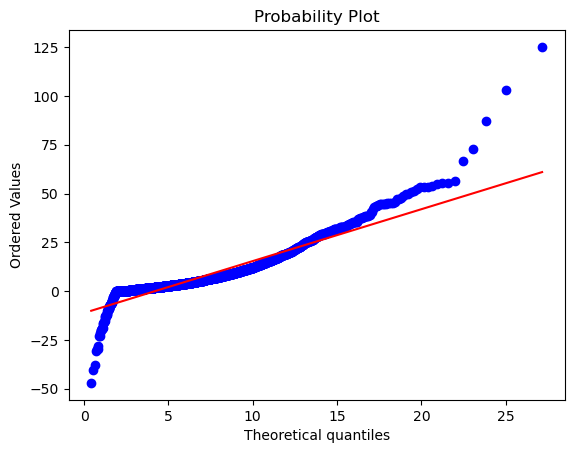

In [169]:
arr2 = np.loadtxt("results/lrt-rcgpr-loocv.txt")
sns.kdeplot(arr2, label="-2*(LOOCV(nocp) - LOOCV(cp))")
sns.kdeplot(ss.chi2(4).rvs(len(arr2)), label="chi2(7)")
plt.legend()
plt.show()

ss.probplot(arr2, dist=ss.chi2(7), plot=plt)

In [138]:
medians = []
for i in range(1000):
    vals = arr2[:,0]
    vals2 = arr2[:,1]
    vals = np.random.choice(vals.flatten(), 10)
    vals2 = np.random.choice(vals2.flatten(), 10)
    medians.append((np.mean(vals), np.mean(vals2)))
medians = np.array(medians)
print(np.median(medians, 0))
print(arr2[:,0].mean(), arr2[:,1].mean())

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [5]:
params0 = ss.norm.fit(arr)
print(params0)
params1 = ss.norm.fit(arr2)
print(params1)
samples = min(len(arr), len(arr2))
print(samples)
diff = arr2[:samples]-arr[:samples]
print(ss.logistic.fit(diff))
samp = ss.logistic(0.53, 6.79).rvs(10000)
print(params1[0]-params0[0])

NameError: name 'arr' is not defined

<Axes: ylabel='Density'>

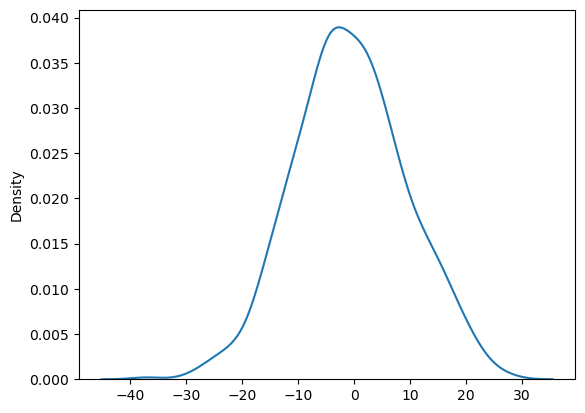

In [30]:
sns.kdeplot(diff)

KstestResult(statistic=0.1861606966329994, pvalue=2.0849707049674092e-22, statistic_location=94.28913143734025, statistic_sign=1)
KstestResult(statistic=0.0706382083367999, pvalue=0.0013948089865120443, statistic_location=4.207183654216408, statistic_sign=1)
KstestResult(statistic=0.1363446246152239, pvalue=1.75734159791071e-13, statistic_location=96.36321591971009, statistic_sign=1)


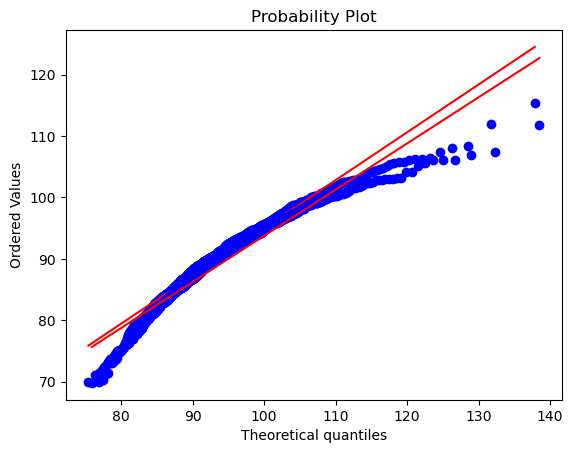

In [31]:
import scipy.stats as stats

stats.probplot(arr, dist=ss.gumbel_r(*params1), plot=plt)
stats.probplot(arr2, dist=ss.gumbel_r(*params0), plot=plt)

print(stats.kstest(arr2, ss.gumbel_r.cdf, args=params0))
print(stats.kstest(diff, ss.logistic.cdf, args=(0.53, 6.8)))
print(stats.kstest(arr, ss.gumbel_r.cdf, args=params1))

<Axes: ylabel='Density'>

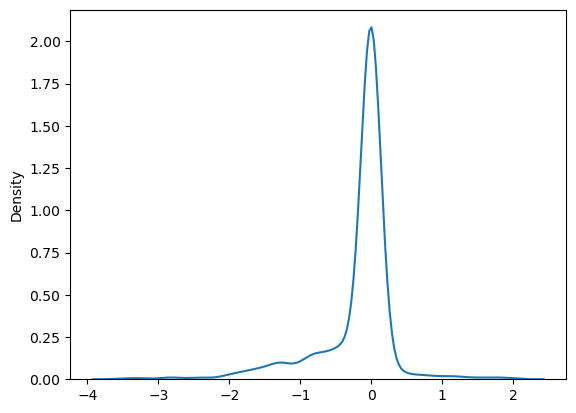

In [32]:
sns.kdeplot(diffs)

In [151]:
arr1 = np.loadtxt("elbo-vgp.txt")[:,0]
arr2 = np.loadtxt("elbo-vgp.txt")[:,1]
len(arr2)

1591

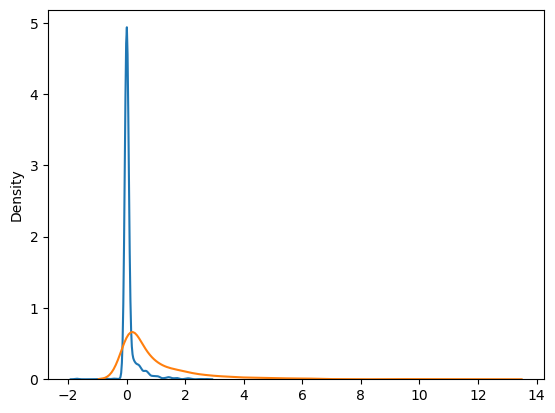

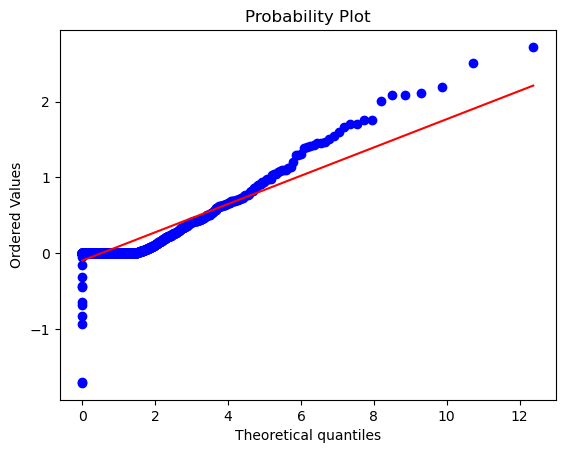

(0.09334684709066166, -2.712781475371714, 2.78777500676805)
[   5.33088196 -385.9637258   125.63089222]
[   5.3222026  -385.88550862  125.65340792]


/home/janneke/micromamba/envs/gp/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6471: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


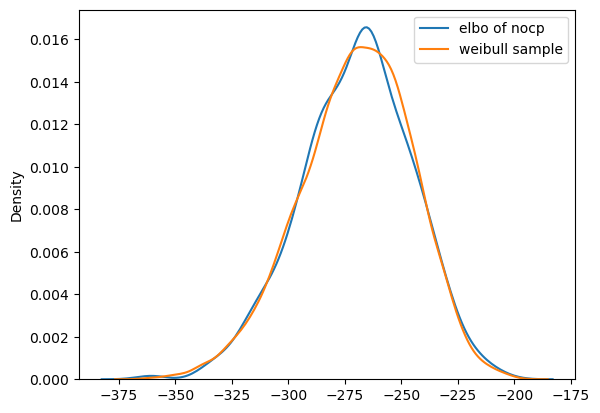

((array([-356.52943365, -351.20501662, -348.02599926, ..., -207.86693528,
         -205.49296966, -201.3204143 ]),
  array([-365.60001415, -360.04479613, -359.85162116, ..., -207.42406424,
         -204.88977425, -200.16260028])),
 (0.9910550243742884, -2.3494398434109485, 0.9993518429439054))

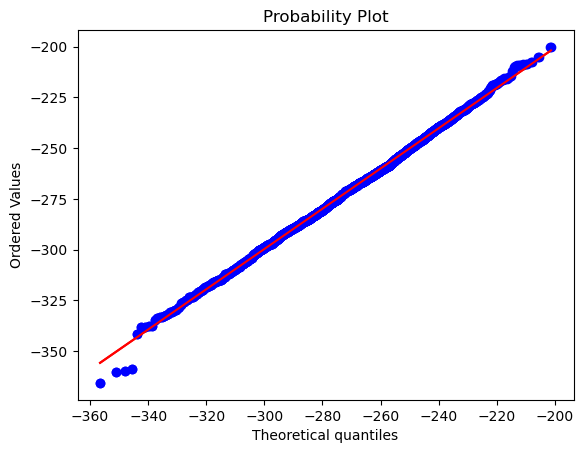

In [155]:
sns.kdeplot(arr2-arr1)
sns.kdeplot(ss.chi2(1).rvs(len(arr1)))
plt.show()
ss.probplot(arr2-arr1, dist=ss.chi2(1), plot=plt)
plt.show()
print(ss.lognorm.fit(arr2-arr1))

sns.kdeplot(arr1, label="elbo of nocp")
g1 = np.array(ss.weibull_min.fit(arr1))
sns.kdeplot(ss.weibull_min(*g1).rvs(10000), label="weibull sample")
plt.legend()
print(g1)
print(g2)
plt.show()

ss.probplot(arr1, dist=ss.weibull_min(*g1), plot=plt)
ss.probplot(arr2, dist=ss.weibull_min(*g2), plot=plt)